## 15 Pandas Example - Used Cars

A short tour through some used car data

* https://data.world/data-society/used-cars-data

This is a real-world data set with couple of flaws: wrong or missing data, outliers.

In the process we:

* inspect the data
* dig into the strange (ugly) parts and clean bad rows
* run a few aggregations and visualisation

In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/autos.csv", encoding="latin-1")

In [4]:
df.shape

(371528, 20)

## Inspection

* unique
* groupby
* size
* sort_values

Unique Brands

In [5]:
df.brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada'], dtype=object)

In [6]:
df.brand.unique().size

40

Most popular brands

In [7]:
df.groupby('brand').size().sort_values(ascending=False)

brand
volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
dtype: int64

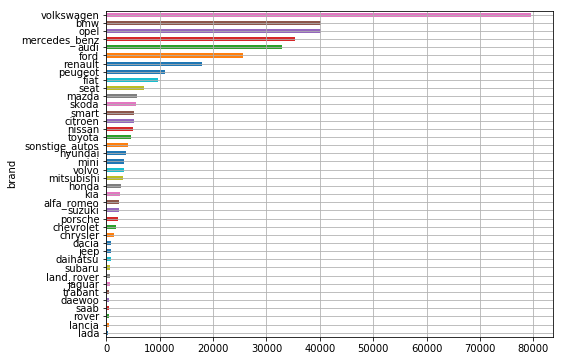

In [8]:
df.groupby('brand').size().sort_values().plot(kind='barh', figsize=(8, 6), grid=True)

In [9]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Null checks?

* isnull
* any
* head
* sum

In [10]:
df.isnull().values.any()

True

Ok, but where?

In [11]:
df[df.isnull().any(axis=1)].head() # 1/3 of rows contain 0 values

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [12]:
df[df.isnull().any(axis=1)].shape # about 1/3 of rows contain 0 values

(110572, 20)

Which columns?

In [13]:
void = df[pd.isnull(df).any(axis=1)].loc[:, df.isna().any()]

In [14]:
void.shape

(110572, 5)

We created a new data frame, see checks.

In [15]:
void.values.base is df.values

False

In [16]:
void._is_view

False

Counting null values.

In [17]:
void.isnull()

,vehicleType,gearbox,model,fuelType,notRepairedDamage
0,True,False,False,False,True
1,False,False,True,False,False
2,False,False,False,False,True
8,False,False,False,False,True
9,False,False,False,True,True
12,False,False,False,False,True
13,False,False,False,True,False
15,False,True,False,False,True
16,True,True,False,False,True
22,True,False,False,False,False


In [18]:
void.isnull().sum()

vehicleType          37869
gearbox              20209
model                20484
fuelType             33386
notRepairedDamage    72060
dtype: int64

Question: Is there a group brands, that do not have a vehicle type?



In [19]:
s = df[df.vehicleType.isnull()].groupby('brand').size().sort_values(ascending=False)

In [20]:
s.head()

brand
volkswagen       9798
opel             4979
bmw              2862
ford             2820
mercedes_benz    2540
dtype: int64

What is the ratio of undefined types for each brand in this dataset?

In [21]:
(s / df.groupby('brand').size()).describe()

count    40.000000
mean      0.102387
std       0.050854
min       0.039623
25%       0.071718
50%       0.098849
75%       0.123989
max       0.296108
dtype: float64

In [22]:
(s / df.groupby('brand').size()).sort_values(ascending=False).head(10)

brand
trabant           0.296108
sonstige_autos    0.267454
daewoo            0.143911
rover             0.140816
lada              0.133333
renault           0.131337
fiat              0.128152
daihatsu          0.125310
honda             0.124824
opel              0.124053
dtype: float64

Oh right, the GDR built cars, too.

Ok, look at the prices.

In [23]:
df.price.describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [24]:
# Suppress scientific notation.

In [25]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [26]:
df.price.describe()

count       371528.000
mean         17295.142
std        3587953.744
min              0.000
25%           1150.000
50%           2950.000
75%           7200.000
max     2147483647.000
Name: price, dtype: float64

Simple outlier detection.

In [27]:
len(df[df.price > 3 * df.price.mean()])

1523

In [28]:
df[df.price > 3 * df.price.mean()].shape

(1523, 20)

In [29]:
df[df.price > 3 * df.price.mean()].describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,1523.000,1523.000,1523.000,1523.000,1523.000,1523.000,1523.000
mean,2901972.966,2015.128,332.602,57038.739,5.631,0.000,57059.345
std,55982903.509,310.438,420.360,47608.681,3.356,0.000,24806.967
min,51899.000,1000.000,0.000,5000.000,0.000,0.000,1067.000
25%,59000.000,1997.000,224.000,20000.000,3.000,0.000,38441.000
50%,69997.000,2010.000,320.000,40000.000,6.000,0.000,60386.000
75%,106498.000,2014.000,422.000,90000.000,8.000,0.000,78269.500
max,2147483647.000,9999.000,11620.000,150000.000,12.000,0.000,99880.000


Question: Which used car brands cost 50000 to 60000?

In [30]:
df[(df.price > 50000) & (df.price < 60000)].groupby('brand').size().sort_values(ascending=False)

brand
porsche           153
audi               90
mercedes_benz      76
bmw                75
sonstige_autos     32
volkswagen         25
land_rover         10
ford                9
jaguar              8
toyota              3
chevrolet           3
alfa_romeo          3
jeep                2
volvo               1
renault             1
lancia              1
dtype: int64

And which ones cost over 100k?

In [31]:
df[(df.price > 100000)].groupby('brand').size().sort_values(ascending=False)

brand
porsche           158
sonstige_autos     88
mercedes_benz      46
bmw                28
volkswagen         28
audi               17
jaguar              8
ford                7
opel                4
land_rover          3
suzuki              2
fiat                2
jeep                1
chevrolet           1
citroen             1
volvo               1
mazda               1
mitsubishi          1
renault             1
seat                1
skoda               1
toyota              1
trabant             1
alfa_romeo          1
dtype: int64

Getting closer to the outlier?

In [32]:
df[(df.price > 500000)].groupby('brand').size().sort_values(ascending=False)

brand
volkswagen        23
sonstige_autos    20
bmw               13
porsche           11
audi               8
mercedes_benz      6
ford               5
opel               4
fiat               2
volvo              1
citroen            1
chevrolet          1
mazda              1
jeep               1
suzuki             1
trabant            1
alfa_romeo         1
dtype: int64

Let's look at these gems.

In [33]:
df[(df.price > 400000)][["name", "seller", "price", "yearOfRegistration"]]

,name,seller,price,yearOfRegistration
1846,BMW_M1_Museumsfahrzeug_Neuwagenzustand_Glossy_...,privat,579000,1980
10649,Porsche_996_GT2_MK2_Clubsport,privat,420000,2004
14663,Tausch_moeglich_Polo_vw_n9,privat,11111111,2003
16889,Ford_Mondeo_Kombi_TÜV_abgelaufen,privat,1000000,1998
20143,Porsche_911R_Einer_von_911,privat,1250000,2016
20746,Golf3_Schlachtfest,privat,12345678,1995
21467,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,privat,9999999,1967
26327,Porsche_911_R,privat,600000,2016
38445,2_VW_Busse_T3,privat,999999,1981
39625,Tausche_volvo_v40_gegen_van,privat,12345678,2018


Let's ignore all rows, where price is silly. Int and string match?

In [34]:
df[(df.price > 400000)].price.dtype

dtype('int64')

In [35]:
df[(df.price > 400000)].price.astype(str).dtype

dtype('O')

Exclude some, but maybe all.

In [36]:
df[(df.price > 400000)].price.astype(str).str.match("999|111|12345|911911").sum()

55

* https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

```
df = df.drop(df[df.score < 50].index)
```

Let's drop these things above 500000.

In [37]:
df = df.drop(df[df.price > 500000].index)

In [38]:
df = df.drop(df[df.price < 1].index)

In [39]:
df.shape

(360650, 20)

In [40]:
df.price.dtype

dtype('int64')

In [41]:
df = df.drop(df[df.yearOfRegistration > 2018].index)

In [42]:
df = df.drop(df[df.yearOfRegistration < 1886].index)

In [43]:
df.shape

(360485, 20)

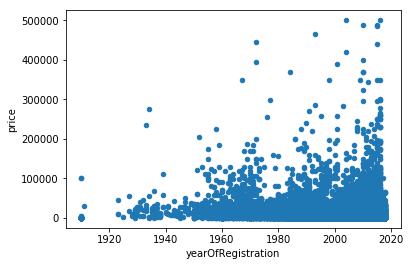

In [44]:
df.plot(kind="scatter", x="yearOfRegistration", y="price")

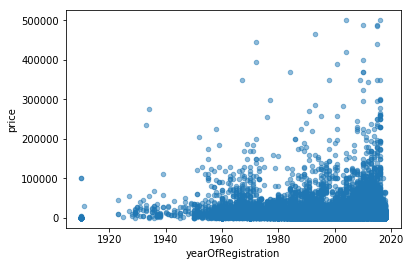

In [45]:
df.plot(kind="scatter", x="yearOfRegistration", y="price", alpha=0.5)

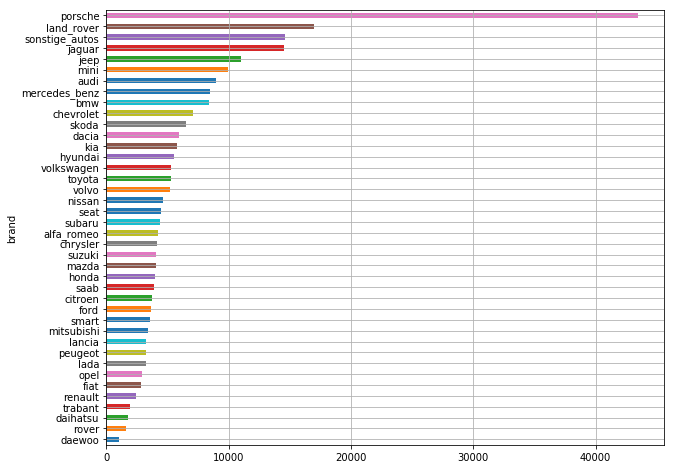

In [46]:
df.groupby('brand').price.mean().sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), grid=True)

What else?

In [47]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Did PS increase over the years?

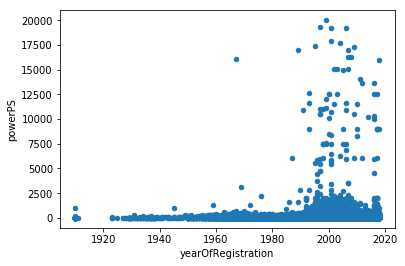

In [48]:
df.plot(kind="scatter", x="yearOfRegistration", y="powerPS")

Ok, let's drop some more. 7500 PS?

In [49]:
df[df.powerPS > 500].head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
390,2016-03-31 21:59:23,Mercedes_Benz_ML_63_AMG_4Matic_7G_TRONIC,privat,Angebot,21500,test,suv,2007,automatik,510,m_klasse,150000,4,lpg,mercedes_benz,nein,2016-03-31 00:00:00,0,33178,2016-04-06 17:45:19
1898,2016-03-22 20:52:00,Toyota_Corolla,privat,Angebot,3200,control,kleinwagen,2004,manuell,1398,corolla,5000,6,benzin,toyota,nein,2016-03-22 00:00:00,0,22043,2016-03-22 21:43:26
1903,2016-03-20 13:51:55,Corvette_C6_505_PS___Pfadt_Vossen__LG___inz._M...,privat,Angebot,34899,test,coupe,2006,manuell,505,NaN,20000,7,benzin,sonstige_autos,nein,2016-03-20 00:00:00,0,21702,2016-04-06 15:45:29
2735,2016-03-16 11:41:35,Ferrari_California_F1,privat,Angebot,120000,test,cabrio,2012,automatik,666,NaN,20000,7,benzin,sonstige_autos,nein,2016-03-16 00:00:00,0,80331,2016-03-21 10:48:23
4254,2016-04-03 20:31:00,Mitsubishi_Colt_Diesel_1_5,privat,Angebot,3100,control,limousine,2005,manuell,953,colt,150000,4,diesel,mitsubishi,nein,2016-04-03 00:00:00,0,60326,2016-04-07 14:56:46


In [50]:
df[df.powerPS > 500].shape

(785, 20)

In [51]:
df = df.drop(df[df.powerPS > 500].index)

In [52]:
df.shape

(359700, 20)

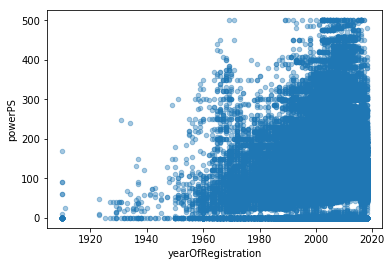

In [53]:
df.plot(kind="scatter", x="yearOfRegistration", y="powerPS", alpha=0.4)

There seems to be some spike in the 1970? Some breakthrough?

What else?

In [54]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Price categories for vehicle types?

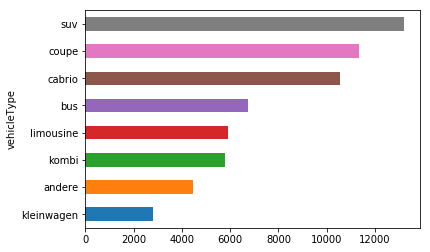

In [55]:
df.groupby('vehicleType').price.mean().sort_values().plot(kind='barh')

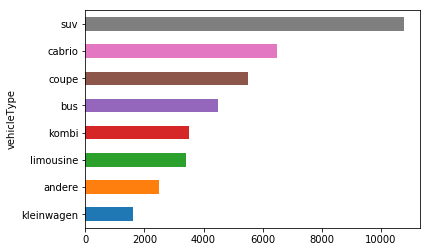

In [56]:
df.groupby('vehicleType').price.median().sort_values().plot(kind='barh')

What else?

In [57]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Last question: Fuel type.

In [58]:
df.fuelType.unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

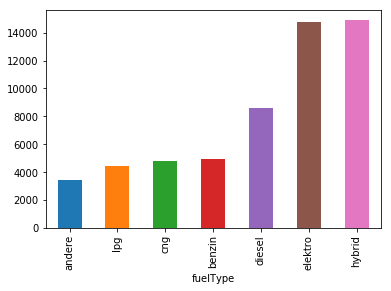

In [59]:
df.groupby('fuelType').price.mean().sort_values().plot(kind='bar')